In [ ]:
import numpy as np

In [ ]:
def compute_nmad(series):
    med = np.median(series)
    return 1.4826 * np.median(np.abs(series - med))


In [1]:
import duckdb

dem_list = [
    "alos", "aster", "copernicus", "fab", "nasa", "srtm", "tan"
]

# Формуємо запит
query = """
SELECT
    lulc_class,
    alos_dem_slope AS slope,
    alos_dem_twi AS twi,
    alos_dem_2000 AS hand,
    alos_dem_geomorphon AS geomorphon,
    alos_dem_stream AS dist_river,
    delta_alos_dem,
    delta_aster_dem,
    delta_copernicus_dem,
    delta_fab_dem,
    delta_nasa_dem,
    delta_srtm_dem,
    delta_tan_dem,
    CASE
        WHEN delta_alos_dem <= delta_aster_dem AND delta_alos_dem <= delta_copernicus_dem AND delta_alos_dem <= delta_fab_dem
             AND delta_alos_dem <= delta_nasa_dem AND delta_alos_dem <= delta_srtm_dem AND delta_alos_dem <= delta_tan_dem THEN 'alos'
        WHEN delta_aster_dem <= delta_copernicus_dem AND delta_aster_dem <= delta_fab_dem
             AND delta_aster_dem <= delta_nasa_dem AND delta_aster_dem <= delta_srtm_dem AND delta_aster_dem <= delta_tan_dem THEN 'aster'
        WHEN delta_copernicus_dem <= delta_fab_dem AND delta_copernicus_dem <= delta_nasa_dem
             AND delta_copernicus_dem <= delta_srtm_dem AND delta_copernicus_dem <= delta_tan_dem THEN 'copernicus'
        WHEN delta_fab_dem <= delta_nasa_dem AND delta_fab_dem <= delta_srtm_dem AND delta_fab_dem <= delta_tan_dem THEN 'fab'
        WHEN delta_nasa_dem <= delta_srtm_dem AND delta_nasa_dem <= delta_tan_dem THEN 'nasa'
        WHEN delta_srtm_dem <= delta_tan_dem THEN 'srtm'
        ELSE 'tan'
    END AS best_dem
FROM 'data/icesat2_dem_filtered_fixed_1.parquet'
WHERE
    lulc_class IS NOT NULL AND
    alos_dem_slope IS NOT NULL AND
    alos_dem_twi IS NOT NULL AND
    alos_dem_2000 IS NOT NULL
"""


In [2]:
df = duckdb.query(query).to_df()


In [3]:
print(df.head())
print(df["best_dem"].value_counts())


   lulc_class      slope       twi  hand  geomorphon  dist_river  \
0         2.0  14.506254  4.583235  89.9         5.0  294.614233   
1         2.0  14.506254  4.583235  89.9         5.0  294.614233   
2         2.0  14.506254  4.583235  89.9         5.0  294.614233   
3         2.0  14.506254  4.583235  89.9         5.0  294.614233   
4         2.0  14.506254  4.583235  89.9         5.0  294.614233   

   delta_alos_dem  delta_aster_dem  delta_copernicus_dem  delta_fab_dem  \
0       20.750136        12.750136             15.986708       3.201796   
1       20.750136        12.750136             15.986708       3.201796   
2       11.195937        13.195937             16.432509       3.647597   
3       11.195937        13.195937             16.432509       3.647597   
4       10.507826        12.507826             15.744398       2.959486   

   delta_nasa_dem  delta_srtm_dem  delta_tan_dem best_dem  
0       12.057997        8.750136      15.985487      fab  
1       12.057997   

In [5]:
query = """
SELECT
    lulc_class,
    alos_dem_geomorphon AS geomorphon,
    alos_dem_slope AS slope,
    alos_dem_2000 AS hand,
    abs_delta_alos_dem,
    abs_delta_aster_dem,
    abs_delta_copernicus_dem,
    abs_delta_fab_dem,
    abs_delta_nasa_dem,
    abs_delta_srtm_dem,
    abs_delta_tan_dem
FROM 'data/tracks_3857_1.parquet'
WHERE
    lulc_class IS NOT NULL AND
    alos_dem_geomorphon IS NOT NULL AND
    alos_dem_slope IS NOT NULL AND
    alos_dem_2000 IS NOT NULL AND
    atl03_cnf = 4 AND atl08_class = 1


"""
df = duckdb.query(query).to_df()


In [6]:
df


,lulc_class,geomorphon,slope,hand,abs_delta_alos_dem,abs_delta_aster_dem,abs_delta_copernicus_dem,abs_delta_fab_dem,abs_delta_nasa_dem,abs_delta_srtm_dem,abs_delta_tan_dem
0,2.0,6.0,15.656391,63.90,14.577062,20.577062,9.667760,24.165379,17.270116,21.577062,9.668980
1,2.0,6.0,15.656391,63.90,4.077794,10.077794,0.831508,13.666112,6.770848,11.077794,0.830287
2,2.0,6.0,15.656391,63.90,12.843785,18.843785,7.934483,22.432103,15.536839,19.843785,7.935704
3,2.0,6.0,19.652477,57.14,12.395421,18.395421,7.486119,21.983739,15.088475,19.395421,7.487340
4,2.0,6.0,19.652477,57.14,11.662267,9.662267,1.247035,13.250584,6.355321,10.662267,1.245814
...,...,...,...,...,...,...,...,...,...,...,...
6526137,2.0,9.0,15.166249,122.38,20.189415,0.189415,13.676842,12.707726,14.834862,10.189415,13.673729
6526138,2.0,9.0,15.166249,122.38,25.874962,5.874962,19.362389,18.393272,20.520409,15.874962,19.359276
6526139,2.0,9.0,15.166249,122.38,2.811317,22.811317,9.323891,10.293007,8.165871,12.811317,9.327003
6526140,2.0,9.0,15.166249,122.38,24.954491,4.954491,18.441917,17.472801,19.599938,14.954491,18.438805


In [23]:
import pandas as pd

In [33]:
df= pd.read_parquet('data/nmad_best_dem.parquet')

In [34]:

print(df["best_dem"].value_counts())

best_dem
alos          10917
fab            7928
nasa           6485
aster          5574
srtm           4936
copernicus     4755
tan            2237
Name: count, dtype: int64


In [35]:
print(df.head())
print(df["best_dem"].value_counts())
print(df["best_dem"].value_counts().to_dict())
print(df.describe())

   geomorphon      slope        hand       twi   dist_river  lulc  nmad_alos  \
0         5.0   3.829117   85.135876  3.175687    26.610989  11.0   0.447929   
1         5.0  11.319843   86.138496  5.024798    37.633622   2.0   0.195731   
2         5.0  39.100098  147.727197  3.438630   261.544170   2.0   9.830957   
3         7.0  23.882845  154.080435  6.724951   432.232739   2.0   1.538523   
4         6.0  15.715055  201.432729  8.064340  1417.947178   2.0   2.600407   

   nmad_aster  nmad_cop  nmad_fab  nmad_nasa  nmad_srtm  nmad_tan best_dem  
0    0.383907  0.391372  0.340019   0.391372   0.391372  0.391372      fab  
1    4.829787  1.860470  3.038252   3.851990  10.261616  1.860922     alos  
2    2.392122  2.392122  2.392122   1.100910   1.965921  2.392122     nasa  
3    2.152367  2.084454  2.152367   2.112868   1.596799  2.084454     alos  
4    8.387766  2.510821  3.933360   2.221185   2.221185  2.507925     nasa  
best_dem
alos          10917
fab            7928
nasa    

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Завантажимо знову
df = pd.read_parquet("data/NMAD_dem.parquet")

In [12]:
print(df.head())

   region  sc_orient  track  segment_dist  solar_elevation  segment_id  \
0     6.0        1.0    1.0  1.472971e+07       -40.574150    735397.0   
1     6.0        1.0    1.0  1.472969e+07       -40.574062    735396.0   
2     6.0        1.0    1.0  1.472971e+07       -40.574150    735397.0   
3     6.0        1.0    1.0  1.472969e+07       -40.574062    735396.0   
4     6.0        1.0    1.0  1.472971e+07       -40.574150    735397.0   

   background_rate  cycle  pair    rgt  ...          y        x_merc  \
0      4090.916847    1.0   1.0  556.0  ...  47.974189  2.755990e+06   
1      7391.476707    1.0   1.0  556.0  ...  47.974189  2.755990e+06   
2      4090.916847    1.0   1.0  556.0  ...  47.974145  2.755990e+06   
3      7391.476707    1.0   1.0  556.0  ...  47.974145  2.755990e+06   
4      4090.916847    1.0   1.0  556.0  ...  47.974119  2.755989e+06   

         y_merc  nmad_alos  nmad_aster   nmad_cop  nmad_fab  nmad_nasa  \
0  6.102562e+06  25.328853    6.590363  19.52246

In [13]:
print(df.describe())

             region     sc_orient         track  segment_dist  \
count  2.022807e+06  2.022807e+06  2.022807e+06  2.022807e+06   
mean   3.466176e+00  7.498961e-01  2.301205e+00  8.780557e+06   
min    2.000000e+00  0.000000e+00  1.000000e+00  5.309679e+06   
25%    2.000000e+00  0.000000e+00  2.000000e+00  5.333323e+06   
50%    2.000000e+00  1.000000e+00  2.000000e+00  5.349011e+06   
75%    6.000000e+00  1.000000e+00  3.000000e+00  1.472213e+07   
max    6.000000e+00  1.000000e+00  3.000000e+00  1.476160e+07   
std    1.927442e+00  4.330728e-01  7.744581e-01  4.528123e+06   

       solar_elevation    segment_id  background_rate         cycle  \
count     2.022807e+06  2.022807e+06     2.022807e+06  2.022807e+06   
mean     -3.305679e+01  4.381901e+05     2.576847e+04  9.114034e+00   
min      -6.245974e+01  2.647910e+05    -5.589418e-13  1.000000e+00   
25%      -5.829999e+01  2.659710e+05     1.182217e+04  6.000000e+00   
50%      -2.659019e+01  2.667540e+05     2.296933e+04  8.00

In [17]:
x = [x for x in df.columns]
print(x)


['region', 'sc_orient', 'track', 'segment_dist', 'solar_elevation', 'segment_id', 'background_rate', 'cycle', 'pair', 'rgt', 'snowcover', 'yapc_score', 'height', 'y_atc', 'landcover', 'x_atc', 'relief', 'quality_ph', 'atl03_cnf', 'atl08_class', 'spot', 'time', 'geoid_height', 'orthometric_height', 'h_alos_dem', 'delta_alos_dem', 'abs_delta_alos_dem', 'h_aster_dem', 'delta_aster_dem', 'abs_delta_aster_dem', 'h_copernicus_dem', 'delta_copernicus_dem', 'abs_delta_copernicus_dem', 'h_fab_dem', 'delta_fab_dem', 'abs_delta_fab_dem', 'h_nasa_dem', 'delta_nasa_dem', 'abs_delta_nasa_dem', 'h_srtm_dem', 'delta_srtm_dem', 'abs_delta_srtm_dem', 'h_tan_dem', 'delta_tan_dem', 'abs_delta_tan_dem', 'year', 'lulc_class', 'lulc_name', 'alos_dem_slope', 'aster_dem_slope', 'copernicus_dem_slope', 'fab_dem_slope', 'nasa_dem_slope', 'srtm_dem_slope', 'tan_dem_slope', 'alos_dem_geomorphon', 'alos_dem_landform', 'aster_dem_geomorphon', 'aster_dem_landform', 'copernicus_dem_geomorphon', 'copernicus_dem_landfor

In [2]:
df[['nmad_alos', 'nmad_aster', 'nmad_cop', 'nmad_fab', 'nmad_nasa', 'nmad_srtm', 'nmad_tan']].describe()


,nmad_alos,nmad_aster,nmad_cop,nmad_fab,nmad_nasa,nmad_srtm,nmad_tan
count,2.021218e+06,2.021358e+06,2.021358e+06,2.021358e+06,2.021358e+06,2.021358e+06,2.021358e+06
mean,8.582621e+00,9.629849e+00,8.258786e+00,4.564778e+00,8.184268e+00,5.997933e+00,8.238860e+00
std,1.053621e+01,1.030723e+01,1.057319e+01,6.218918e+00,8.413346e+00,6.462490e+00,1.058870e+01
min,0.000000e+00,0.000000e+00,6.877295e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.275038e+00,3.432926e+00,1.811464e+00,1.340790e+00,2.959823e+00,2.028942e+00,1.788864e+00
50%,4.143296e+00,7.114892e+00,3.324221e+00,2.528917e+00,5.610393e+00,4.272438e+00,3.287109e+00
75%,1.052931e+01,1.125193e+01,1.107834e+01,4.276796e+00,9.528671e+00,7.093602e+00,1.102529e+01
max,1.270387e+02,1.182848e+02,1.177584e+02,1.373762e+02,1.323012e+02,1.351202e+02,1.178055e+02


In [3]:
nmad_columns = [
    "nmad_alos", "nmad_aster", "nmad_cop",
    "nmad_fab", "nmad_nasa", "nmad_srtm", "nmad_tan"
]

# Групуємо по lulc_class і обчислюємо середні значення
grouped = df.groupby("lulc_class")[nmad_columns].mean().reset_index()

In [4]:
grouped["best_dem"] = grouped[nmad_columns].idxmin(axis=1)
grouped["best_nmad"] = grouped[nmad_columns].min(axis=1)

In [7]:
# 🗂️ LULC словник
lulc_classes_colors = {
    0:  {"name": "No Data", "color": "#FFFFFF"},
    1:  {"name": "Water", "color": "#1A5BAB"},
    2:  {"name": "Trees", "color": "#358221"},
    4:  {"name": "Flooded Vegetation", "color": "#87D19E"},
    5:  {"name": "Crops", "color": "#FFDB5C"},
    7:  {"name": "Built Area", "color": "#ED022A"},
    8:  {"name": "Bare Ground", "color": "#EDE9E4"},
    9:  {"name": "Snow/Ice", "color": "#F2FAFF"},
    10: {"name": "Clouds", "color": "#C8C8C8"},
    11: {"name": "Rangeland", "color": "#A7D282"}
}

In [6]:
print(grouped)

   lulc_class  nmad_alos  nmad_aster   nmad_cop  nmad_fab  nmad_nasa  \
0         1.0   2.613390    6.524125   2.373766  2.500590   5.261097   
1         2.0  13.065660   11.848816  13.294593  6.171055  10.846058   
2         5.0   3.296268    6.678868   2.409845  2.032075   4.034224   
3         7.0   3.303210    5.705756   2.556516  2.311358   4.816089   
4        11.0   4.723092    8.017826   3.966826  3.294175   6.021577   

   nmad_srtm   nmad_tan  best_dem  best_nmad  
0   4.101632   2.746634  nmad_cop   2.373766  
1   7.612834  13.275025  nmad_fab   6.171055  
2   2.981249   2.381199  nmad_fab   2.032075  
3   3.485898   2.504248  nmad_fab   2.311358  
4   4.786632   3.941992  nmad_fab   3.294175  


In [8]:
# Перетворимо словник у DataFrame
import pandas as pd

lulc_df = pd.DataFrame.from_dict(lulc_classes_colors, orient='index')
lulc_df = lulc_df.reset_index().rename(columns={"index": "lulc_class"})

# Об'єднаємо з твоїм результатом
grouped = grouped.merge(lulc_df, on="lulc_class", how="left")


In [9]:
import plotly.express as px

fig = px.bar(
    grouped,
    x="name",
    y="best_nmad",
    color="best_dem",
    color_discrete_sequence=px.colors.qualitative.Set2,
    text="best_dem",
    title="🏆 Найточніша DEM для кожного класу LULC (за NMAD)"
)

fig.update_layout(
    xaxis_title="Клас землекористування",
    yaxis_title="NMAD (м)",
    xaxis_tickangle=-45,
    showlegend=True
)

fig.show()


In [38]:
import pandas as pd
import plotly.express as px

# 🔁 Перетворимо grouped у long-format для всіх DEM
nmad_columns = [
    "nmad_alos", "nmad_aster", "nmad_cop",
    "nmad_fab", "nmad_nasa", "nmad_srtm", "nmad_tan"
]

grouped_long = grouped.melt(
    id_vars=["lulc_class", "name"],  # залишаємо інфу про LULC
    value_vars=nmad_columns,
    var_name="DEM",
    value_name="NMAD"
)

# 🧼 Форматуємо назви DEM
grouped_long["DEM"] = grouped_long["DEM"].str.replace("nmad_", "").str.upper()

# 🧾 Побудова графіка
fig = px.bar(
    grouped_long,
    x="name",
    y="NMAD",
    color="DEM",
    barmode="group",
    text="NMAD",
    title=" NMAD для кожного DEM у кожному класі землекористування",
    labels={"name": "Клас LULC", "NMAD": "NMAD (м)", "DEM": "DEM"}
)

# 🔧 Додаткове форматування
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


In [18]:
import pandas as pd
df["fab_dem_slope"] = pd.to_numeric(df["fab_dem_slope"], errors="coerce")

# Межі класів у градусах
slope_bins = [0, 5, 10, 15, 20, 25, 30, float("inf")]
slope_labels = ["0–5°", "5–10°", "10–15°", "15–20°", "20–25°", "25–30°", ">30°"]

# Створення нової колонки з класом схилу
df["slope_class"] = pd.cut(
    df["fab_dem_slope"],  # або інший DEM
    bins=slope_bins,
    labels=slope_labels,
    right=False  # межі включаються зліва: [ )
)


In [24]:
df["slope_class"].value_counts().sort_index()
print(df["slope_class"])


0          10–15°
1          10–15°
2          10–15°
3          10–15°
4          10–15°
            ...  
2022802    10–15°
2022803    10–15°
2022804    10–15°
2022805    10–15°
2022806    10–15°
Name: slope_class, Length: 2022807, dtype: category
Categories (7, object): ['0–5°' < '5–10°' < '10–15°' < '15–20°' < '20–25°' < '25–30°' < '>30°']


In [27]:
# Колонки NMAD
nmad_cols = [col for col in df.columns if col.startswith("nmad_")]

# Групування
agg_by_slope = df.groupby("slope_class", observed=True)[nmad_cols].median().reset_index()

# Визначення найкращої DEM для кожного класу (мінімальний NMAD)
agg_by_slope["best_dem"] = agg_by_slope[nmad_cols].idxmin(axis=1)
agg_by_slope["best_nmad"] = agg_by_slope[nmad_cols].min(axis=1)



In [28]:
import plotly.express as px

fig = px.bar(
    agg_by_slope,
    x="slope_class",
    y="best_nmad",
    color="best_dem",
    title="DEM з найменшою помилкою (NMAD) для кожного класу схилу"
)
fig.show()



In [33]:
import pandas as pd
import plotly.express as px

# Якщо ще не зроблено:
df["fab_dem_slope"] = pd.to_numeric(df["fab_dem_slope"], errors="coerce")

# Класи схилів
slope_bins = [0, 5, 10, 15, 20, 25, 30, float("inf")]
slope_labels = ["0–5°", "5–10°", "10–15°", "15–20°", "20–25°", "25–30°", ">30°"]
df["slope_class"] = pd.cut(df["fab_dem_slope"], bins=slope_bins, labels=slope_labels, right=False)

# Колонки NMAD
nmad_cols = [col for col in df.columns if col.startswith("nmad_")]

# Групування: медіани по кожному класу схилу
agg_by_slope = df.groupby("slope_class", observed=True)[nmad_cols].median().reset_index()

# Перетворення в long format
df_slope_long = agg_by_slope.melt(
    id_vars="slope_class",
    value_vars=nmad_cols,
    var_name="DEM",
    value_name="NMAD"
)

# Форматування назв DEM
df_slope_long["DEM"] = df_slope_long["DEM"].str.replace("nmad_", "").str.upper()

# Побудова графіка
fig = px.bar(
    df_slope_long,
    x="slope_class",
    y="NMAD",
    color="DEM",
    barmode="group",
    text="NMAD",
    title="NMAD для кожного DEM по класах схилу",
    labels={"slope_class": "Клас схилу", "NMAD": "NMAD (м)", "DEM": "DEM"}
)

# Покращення вигляду
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()


In [29]:
nmad_cols = [
    "nmad_alos", "nmad_aster", "nmad_cop",
    "nmad_fab", "nmad_nasa", "nmad_srtm", "nmad_tan"
]

agg_by_geomorphon = df.groupby("fab_dem_geomorphon", observed=True)[nmad_cols].median().reset_index()

# Знаходимо найкращий DEM (мінімальний NMAD) для кожного геоморфону
agg_by_geomorphon["best_dem"] = agg_by_geomorphon[nmad_cols].idxmin(axis=1)
agg_by_geomorphon["best_nmad"] = agg_by_geomorphon[nmad_cols].min(axis=1)



In [30]:
landform_names = {
    1: "Flat",
    2: "Peak",
    3: "Ridge",
    4: "Shoulder",
    5: "Spur",
    6: "Slope",
    7: "Hollow",
    8: "Footslope",
    9: "Valley",
    10: "Pit"
}

In [31]:
import plotly.express as px

# Додаємо назву геоморфону
agg_by_geomorphon["landform"] = agg_by_geomorphon["fab_dem_geomorphon"].map(landform_names)

# Сортуємо за порядком геоморфону (опційно)
agg_by_geomorphon = agg_by_geomorphon.sort_values("fab_dem_geomorphon")

# Створюємо графік
fig = px.bar(
    agg_by_geomorphon,
    x="landform",
    y="best_nmad",
    color="best_dem",
    text="best_nmad",
    title="Найкращий DEM (мінімальний NMAD) для кожного типу геоморфону",
    labels={"best_nmad": "NMAD (м)", "landform": "Геоморфон"}
)

# Додаткові налаштування
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()


In [32]:
import pandas as pd
import plotly.express as px

# Додаємо назву геоморфону
agg_by_geomorphon["landform"] = agg_by_geomorphon["fab_dem_geomorphon"].map(landform_names)

# Сортуємо
agg_by_geomorphon = agg_by_geomorphon.sort_values("fab_dem_geomorphon")

# Вибираємо тільки NMAD-стовпці + landform
nmad_cols = [
    "nmad_alos", "nmad_aster", "nmad_cop", "nmad_fab",
    "nmad_nasa", "nmad_srtm", "nmad_tan"
]

# Перетворюємо в long-form (melt)
df_long = agg_by_geomorphon[["landform"] + nmad_cols].melt(
    id_vars="landform",
    value_vars=nmad_cols,
    var_name="DEM",
    value_name="NMAD"
)

# Видаляємо префікс для кращого вигляду
df_long["DEM"] = df_long["DEM"].str.replace("nmad_", "").str.upper()

# Побудова групованого графіка
fig = px.bar(
    df_long,
    x="landform",
    y="NMAD",
    color="DEM",
    barmode="group",
    text="NMAD",
    title="NMAD для кожного DEM по геоморфонах",
    labels={"landform": "Геоморфон", "NMAD": "NMAD (м)", "DEM": "DEM"}
)

# Покращуємо вигляд
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()


In [35]:
import pandas as pd

# Переконайся, що значення числові
df["fab_dem_2000"] = pd.to_numeric(df["fab_dem_2000"], errors="coerce")

# Створюємо класи HAND: 0–1, 1–2, ..., 9–10
bins = list(range(0, 11)) + [float("inf")]  # 0–10 + >10
labels = [f"{i} м" for i in range(1, 11)] + [">10 м"]

# Присвоюємо клас
df["hand_class"] = pd.cut(
    df["fab_dem_2000"],
    bins=bins,
    labels=labels,
    right=False  # включає ліву межу: [)
)

# Перевіримо
print(df["hand_class"].value_counts().sort_index())


hand_class
1 м         6366
2 м        16456
3 м        20075
4 м        18505
5 м        12934
6 м         8258
7 м        10134
8 м         7736
9 м         5687
10 м        7271
>10 м    1656613
Name: count, dtype: int64


In [36]:
nmad_columns = [
    "nmad_alos", "nmad_aster", "nmad_cop",
    "nmad_fab", "nmad_nasa", "nmad_srtm", "nmad_tan"
]

# Групування по класах HAND
agg_by_hand = df.groupby("hand_class", observed=True)[nmad_columns].median().reset_index()

# Перетворюємо в long-form для графіка
hand_long = agg_by_hand.melt(
    id_vars="hand_class",
    value_vars=nmad_columns,
    var_name="DEM",
    value_name="NMAD"
)

# Форматуємо назви DEM
hand_long["DEM"] = hand_long["DEM"].str.replace("nmad_", "").str.upper()


In [39]:
import plotly.express as px

fig = px.bar(
    hand_long,
    x="hand_class",
    y="NMAD",
    color="DEM",
    barmode="group",
    text="NMAD",
    title="NMAD для кожного DEM у класах HAND (висота над руслом)",
    labels={"hand_class": "HAND (м)", "NMAD": "NMAD (м)", "DEM": "DEM"}
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


In [19]:
import plotly.express as px

df_melted = df.melt(
    value_vars=[
        'nmad_alos', 'nmad_aster', 'nmad_cop',
        'nmad_fab', 'nmad_nasa', 'nmad_srtm', 'nmad_tan'
    ],
    var_name='DEM',
    value_name='NMAD'
)

fig = px.box(df_melted, x='DEM', y='NMAD', title='NMAD (error) distribution per DEM')
fig.show()


In [ ]:
dem_cols = ['nmad_alos', 'nmad_aster', 'nmad_cop', 'nmad_fab', 'nmad_nasa', 'nmad_srtm', 'nmad_tan']
df['best_dem'] = df[dem_cols].idxmin(axis=1).str.replace('nmad_', '')


In [9]:
import duckdb
import pandas as pd
import numpy as np

# Налаштування
input_parquet = "data/nmad_all.parquet"  # твій вхідний файл
output_parquet = "data/cdf_precomputed.parquet"  # файл, який збережеш
thresholds = np.arange(0, 51, 1)  # або будь-які інші пороги
dem_list = ["alos", "aster", "cop", "fab", "nasa", "srtm", "tan"]

# Підключення до DuckDB
con = duckdb.connect()
cdf_data = []

# Розрахунок CDF для кожної DEM
for dem in dem_list:
    dem_col = f"nmad_{dem}"
    union_sql = "\nUNION ALL\n".join([
        f"""
        SELECT {t} AS threshold,
               COUNT(*) FILTER (WHERE {dem_col} <= {t}) * 1.0 / COUNT(*) AS cdf
        FROM '{input_parquet}'
        WHERE {dem_col} IS NOT NULL
        """ for t in thresholds
    ])
    df = con.execute(union_sql).fetchdf()
    df["DEM"] = dem.upper()
    cdf_data.append(df)

# Об'єднуємо результати
cdf_df = pd.concat(cdf_data, ignore_index=True)
con.close()

# Зберігаємо в Parquet (або Feather)
cdf_df.to_parquet(output_parquet, index=False)  # або .to_feather(...)
print(f"✅ Збережено CDF у: {output_parquet}")


✅ Збережено CDF у: data/cdf_precomputed.parquet


In [2]:
import pandas as pd

In [2]:
df = pd.read_parquet("data/nmad_all.parquet")

In [3]:
print(df.head())

   nmad_alos  nmad_aster   nmad_cop  nmad_fab  nmad_nasa  nmad_srtm   nmad_tan
0  25.328853    6.590363  19.522465  1.244900  10.331885   4.992167  19.569005
1  25.328853    6.590363  19.522465  1.244900  10.331885   4.992167  19.569005
2  11.163797    7.251307  20.183409  1.905845  10.992830   5.653111  20.229949
3  11.163797    7.251307  20.183409  1.905845  10.992830   5.653111  20.229949
4  10.143605    6.231114  19.163216  0.885652   9.972637   4.632919  19.209756


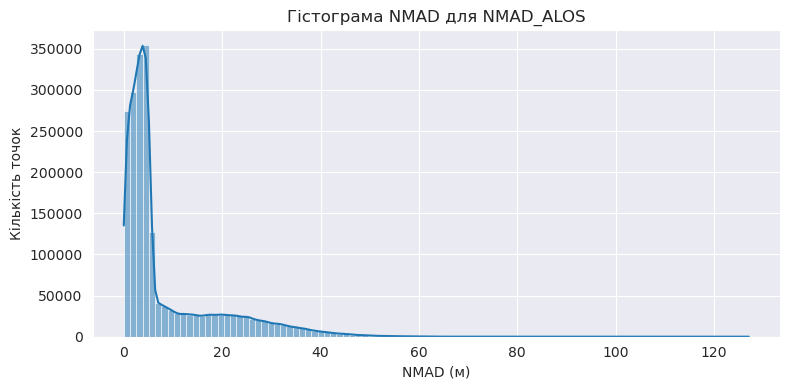

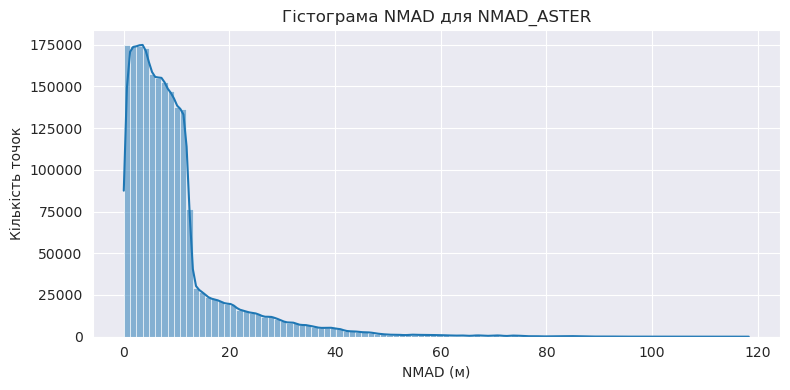

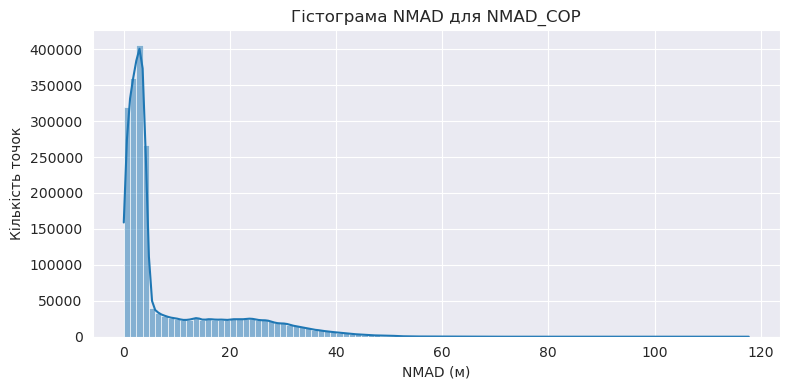

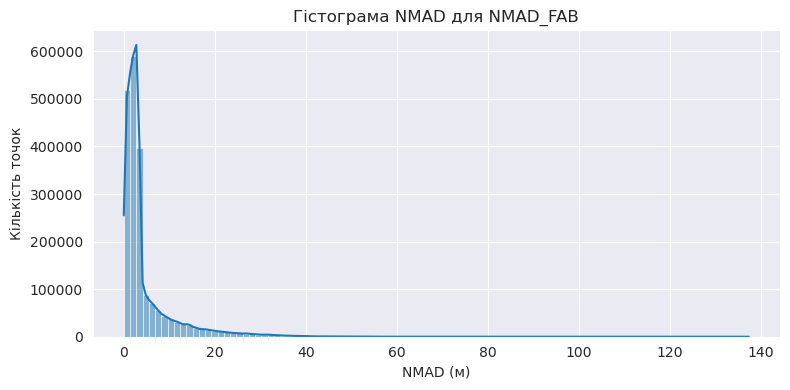

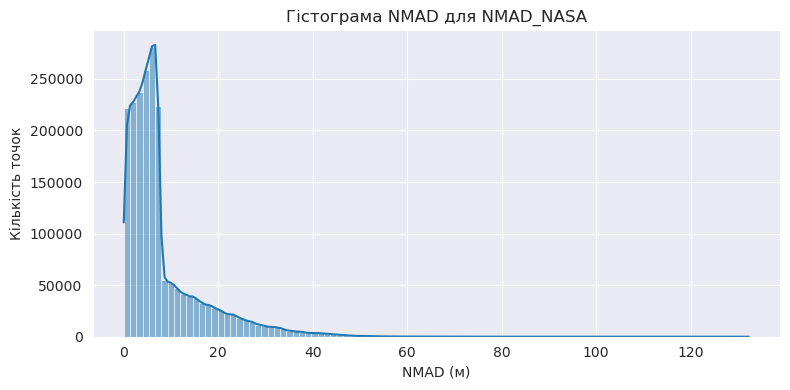

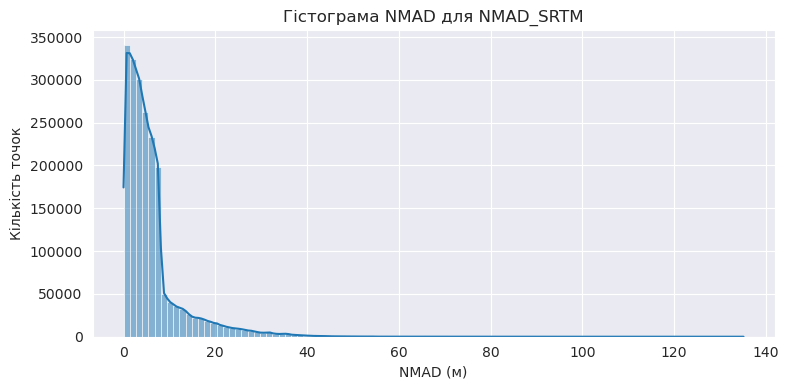

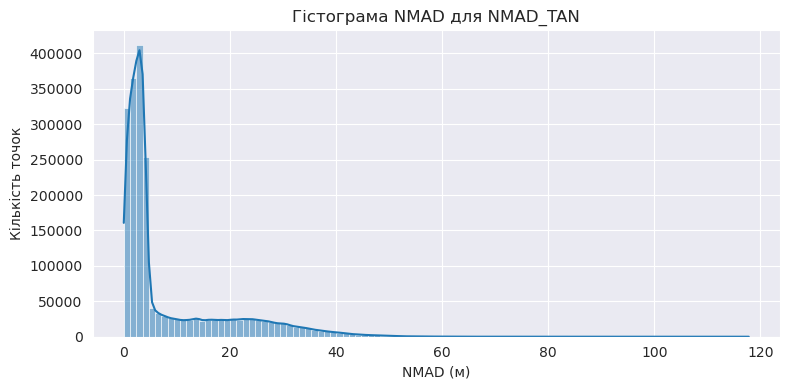

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Побудова гістограм NMAD для кожної DEM
dems = ['nmad_alos', 'nmad_aster', 'nmad_cop', 'nmad_fab', 'nmad_nasa', 'nmad_srtm', 'nmad_tan']

# Створюємо окрему гістограму для кожного DEM
for dem in dems:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[dem], bins=100, kde=True)
    plt.title(f'Гістограма NMAD для {dem.upper()}')
    plt.xlabel('NMAD (м)')
    plt.ylabel('Кількість точок')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [6]:
def plot_cdf(data, column, label=None):
    sorted_data = data[column].dropna().sort_values()
    cdf = sorted_data.rank(method='average', pct=True)  # нормалізоване ранжування
    plt.plot(sorted_data, cdf, label=label)


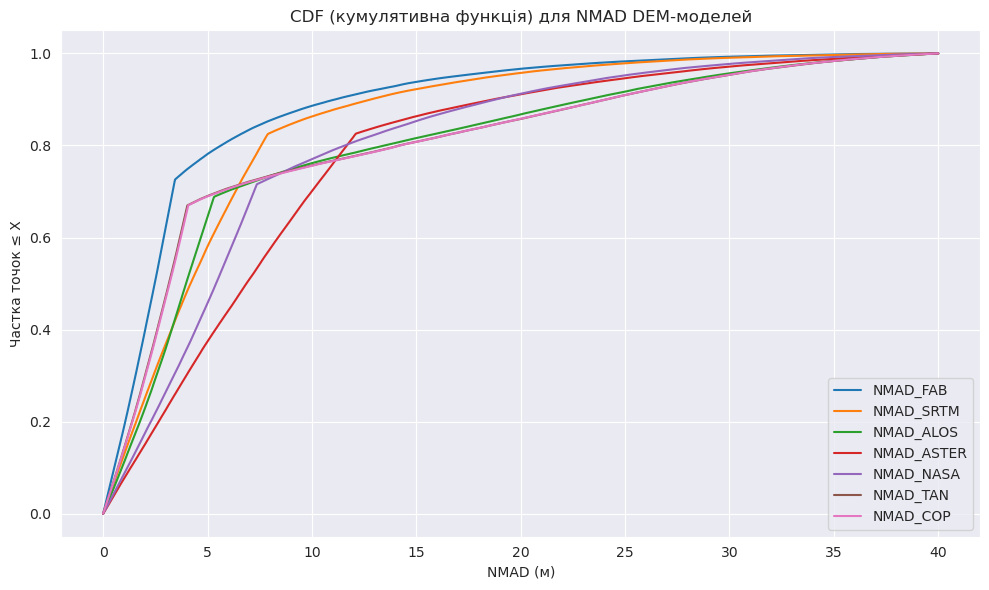

In [7]:
plt.figure(figsize=(10, 6))

dem_columns = [
    "nmad_fab", "nmad_srtm", "nmad_alos",
    "nmad_aster", "nmad_nasa", "nmad_tan", "nmad_cop"
]

for col in dem_columns:
    plot_cdf(df[df[col] < 40], col, label=col.upper())  # фільтр < 40 м — видаляємо артефакти

plt.xlabel("NMAD (м)")
plt.ylabel("Частка точок ≤ X")
plt.title("CDF (кумулятивна функція) для NMAD DEM-моделей")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

/tmp/ipykernel_76980/2705957854.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  slope_best = df.groupby(["slope_cat", "best_dem"]).size().reset_index(name="count")


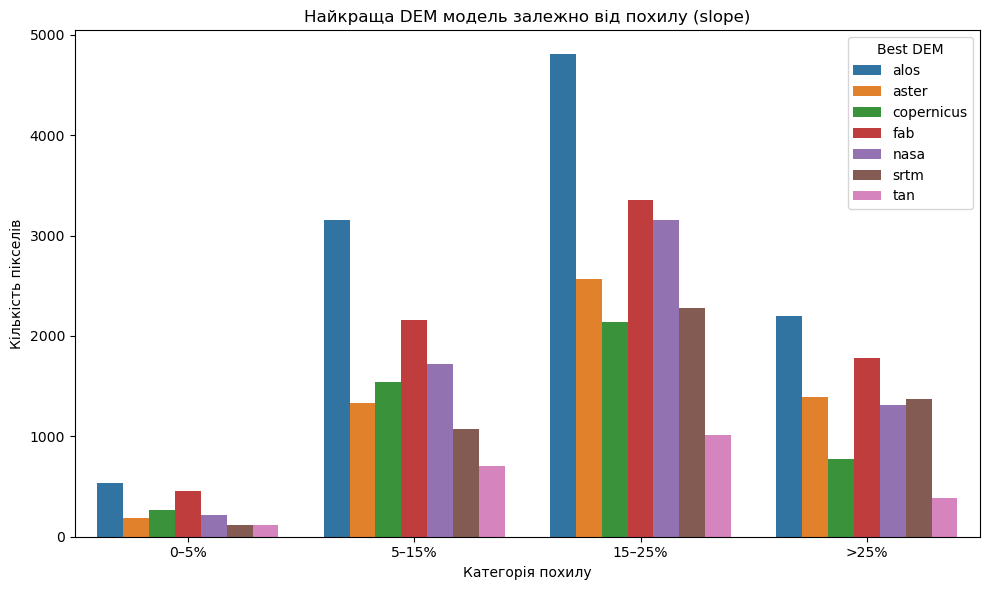

In [42]:


# Створимо категорії для slope (наприклад, 4 групи)
df["slope_cat"] = pd.cut(df["slope"], bins=[0, 5, 15, 25, 90], labels=["0–5%", "5–15%", "15–25%", ">25%"])

# Групуємо: яка модель найчастіше обрана як best_dem в кожній категорії slope
slope_best = df.groupby(["slope_cat", "best_dem"]).size().reset_index(name="count")

# Візуалізуємо
plt.figure(figsize=(10, 6))
sns.barplot(data=slope_best, x="slope_cat", y="count", hue="best_dem")
plt.title("Найкраща DEM модель залежно від похилу (slope)")
plt.xlabel("Категорія похилу")
plt.ylabel("Кількість пікселів")
plt.legend(title="Best DEM")
plt.tight_layout()
plt.show()


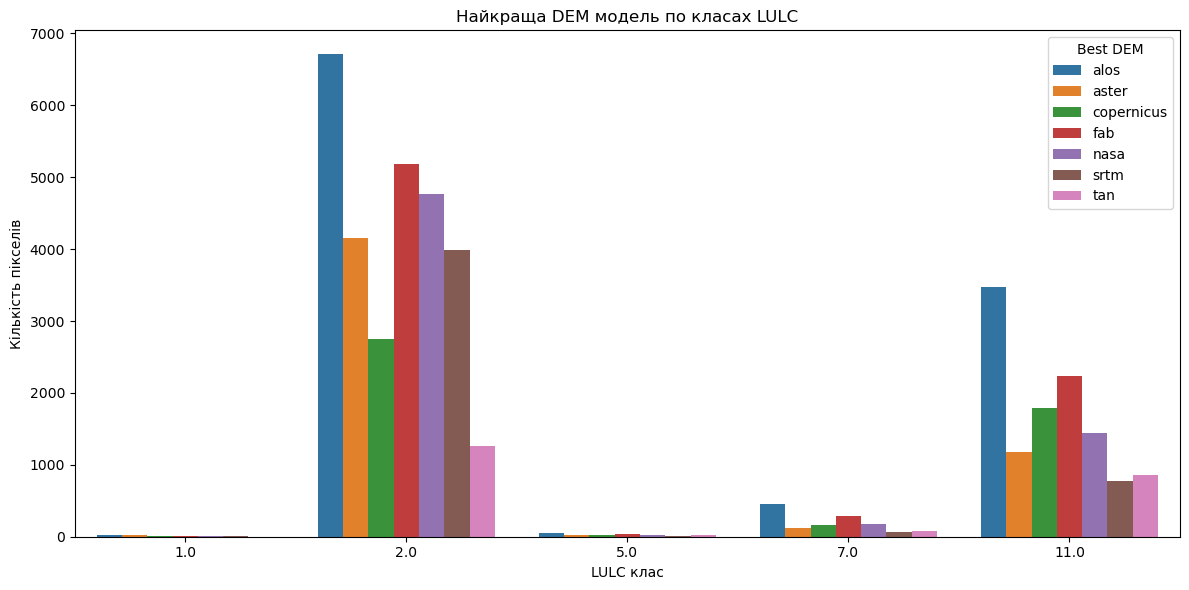

In [43]:
lulc_best = df.groupby(["lulc", "best_dem"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.barplot(data=lulc_best, x="lulc", y="count", hue="best_dem")
plt.title("Найкраща DEM модель по класах LULC")
plt.xlabel("LULC клас")
plt.ylabel("Кількість пікселів")
plt.legend(title="Best DEM")
plt.tight_layout()
plt.show()


nmad_nasa     4.931662
nmad_srtm     5.374988
nmad_fab      5.438515
nmad_alos     5.919334
nmad_cop      6.041962
nmad_tan      6.046557
nmad_aster    6.251135
dtype: float64


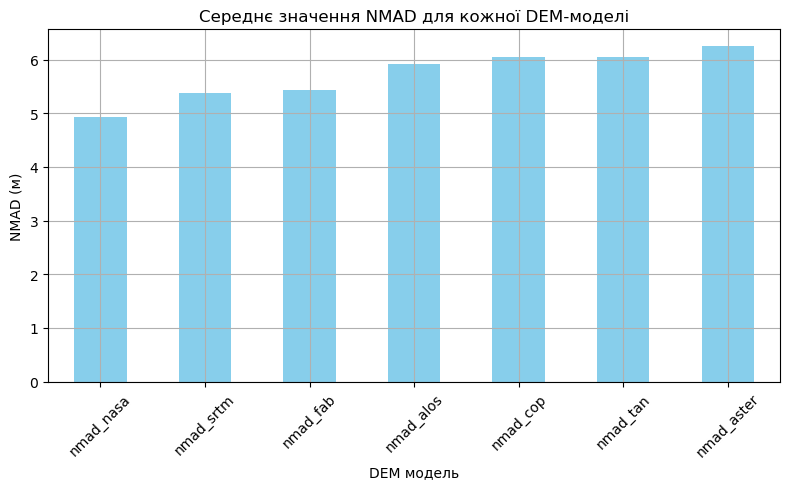

In [44]:
mean_nmad = df[[
    "nmad_alos", "nmad_aster", "nmad_cop", "nmad_fab",
    "nmad_nasa", "nmad_srtm", "nmad_tan"
]].mean().sort_values()

print(mean_nmad)
import matplotlib.pyplot as plt

mean_nmad.plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Середнє значення NMAD для кожної DEM-моделі")
plt.ylabel("NMAD (м)")
plt.xlabel("DEM модель")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


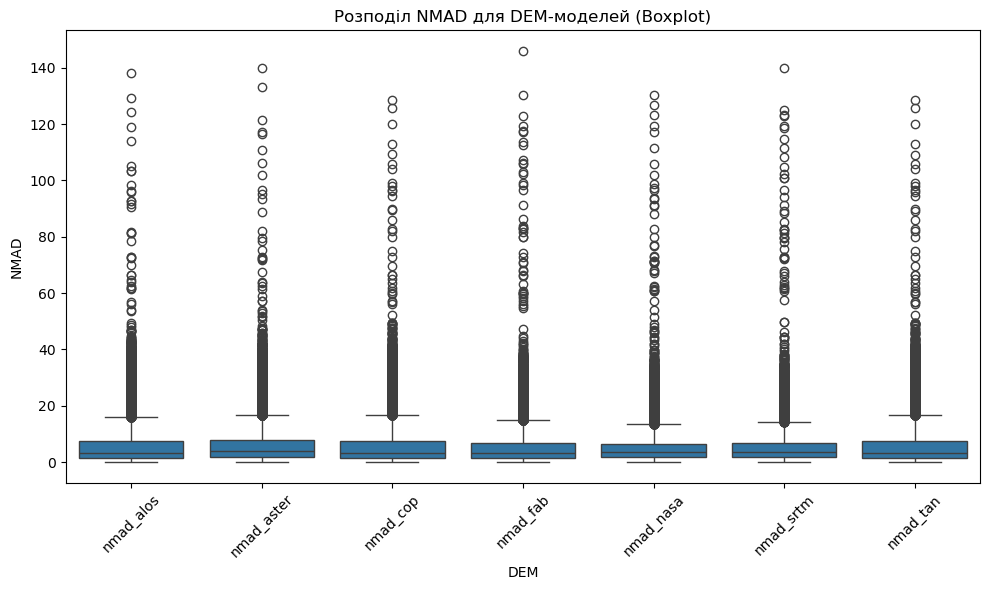

In [45]:
import seaborn as sns

nmad_cols = [
    "nmad_alos", "nmad_aster", "nmad_cop", "nmad_fab",
    "nmad_nasa", "nmad_srtm", "nmad_tan"
]

df_melted = df[nmad_cols].melt(var_name="DEM", value_name="NMAD")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="DEM", y="NMAD")
plt.xticks(rotation=45)
plt.title("Розподіл NMAD для DEM-моделей (Boxplot)")
plt.tight_layout()
plt.show()


<Axes: xlabel='nmad_aster', ylabel='Count'>

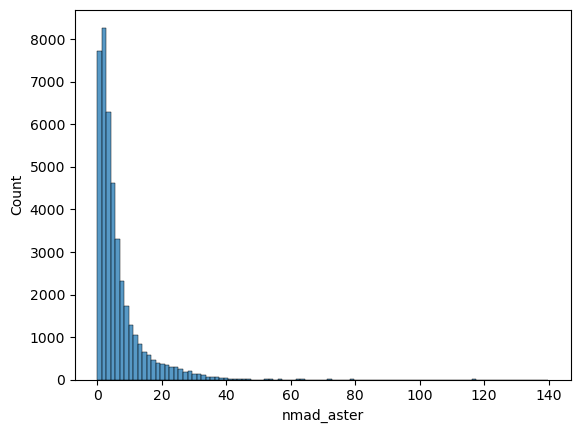

In [46]:
import seaborn as sns
sns.histplot(df["nmad_aster"], bins=100)


🎯 Accuracy: 0.8201027317300957

📊 Classification Report:
               precision    recall  f1-score   support

        alos       0.83      0.98      0.90      2149
       aster       0.81      0.86      0.83      1072
  copernicus       0.63      0.75      0.69      1005
         fab       0.87      0.84      0.86      1632
        nasa       0.89      0.84      0.87      1258
        srtm       0.92      0.78      0.84      1008
         tan       0.37      0.05      0.09       442

    accuracy                           0.82      8566
   macro avg       0.76      0.73      0.72      8566
weighted avg       0.81      0.82      0.80      8566


🧩 Confusion Matrix:
 [[2105   12    7   17    4    4    0]
 [  85  921    7   28   21    9    1]
 [  67   57  758   61   19    8   35]
 [  95   51   51 1377   41   14    3]
 [  82   40   15   37 1058   26    0]
 [  78   52   12   42   40  783    1]
 [  32   11  347   23    3    3   23]]


/tmp/ipykernel_76980/2714682171.py:71: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/niko/miniforge3/envs/geohydroai/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


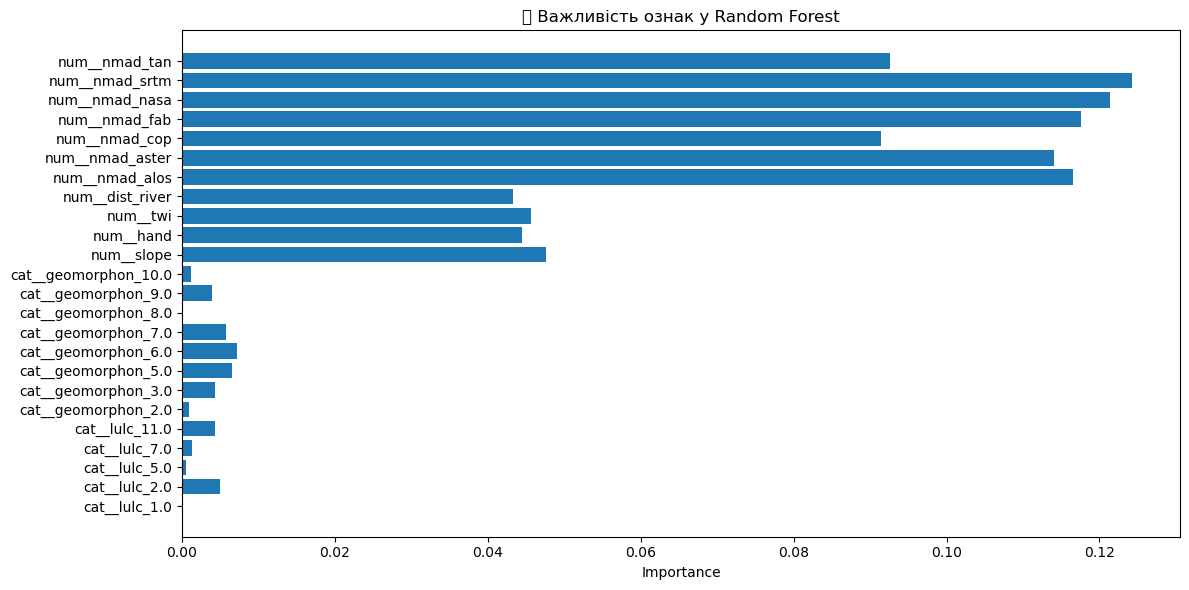

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Створення директорії
os.makedirs("data", exist_ok=True)

# Завантаження
df = pd.read_parquet("data/nmad_best_dem.parquet")
df = df.dropna(subset=["lulc", "geomorphon"])


# Вхідні змінні та ціль
X = df[[
    "lulc", "geomorphon",
    "slope", "hand", "twi", "dist_river",
    "nmad_alos", "nmad_aster", "nmad_cop", "nmad_fab",
    "nmad_nasa", "nmad_srtm", "nmad_tan"
]]
y = df["best_dem"]

# Визначення типів ознак
categorical_features = ["lulc", "geomorphon"]
numerical_features = [
    "slope", "hand", "twi", "dist_river",
    "nmad_alos", "nmad_aster", "nmad_cop", "nmad_fab",
    "nmad_nasa", "nmad_srtm", "nmad_tan"
]

# Побудова пайплайну
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("num", "passthrough", numerical_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання
pipeline.fit(X_train, y_train)

# Передбачення
y_pred = pipeline.predict(X_test)

# Оцінка
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Важливість ознак (тільки для RandomForest)
model = pipeline.named_steps["classifier"]
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = model.feature_importances_

# Візуалізація
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.title("🌲 Важливість ознак у Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [20]:
import joblib
import numpy as np

# Завантаження моделі та енкодера
model = joblib.load("data/model_best_dem.pkl")
landform_encoder = joblib.load("data/landform_encoder.pkl")

def predict_best_dem(slope, hand, twi, dist_river, landform_str):
    # Кодуємо landform
    landform_encoded = landform_encoder.transform([landform_str])[0]

    # Формуємо вхідні дані
    features = np.array([[landform_encoded, slope, hand, twi, dist_river]])

    # Прогнозуємо найкращий DEM
    prediction = model.predict(features)[0]

    return prediction


In [22]:


best = predict_best_dem(
    slope=10,
    hand=3,
    twi=7,
    dist_river=180,
    landform_str="Trees"  # ← те, що було у твоїх даних
)

print("🌍 Найкращий DEM для цієї точки:", best)


ValueError: y contains previously unseen labels: 'Trees'

In [13]:
# train_model_enhanced.py

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Створюємо директорію для моделі, якщо її ще немає
os.makedirs("data", exist_ok=True)

# Завантажуємо parquet з оцінками похибок і DEM
df = pd.read_parquet("data/nmad_best_dem.parquet")

# 🔎 Фільтруємо лише ті точки, де HAND < 10 метрів — критично важлива зона
df = df[df["hand"] < 10]

# 🎯 Кодуємо landform у числовий формат
le = LabelEncoder()
df["landform_encoded"] = le.fit_transform(df["landform"])

# 🧾 Вхідні ознаки — враховуємо як геоморфологію, так і NMAD-похибки DEM
X = df[[
    "landform_encoded", "slope", "hand", "twi", "dist_river",
    "nmad_alos", "nmad_aster", "nmad_cop", "nmad_fab",
    "nmad_nasa", "nmad_srtm", "nmad_tan"
]]

# 🎯 Цільова змінна — яка DEM є найкращою
y = df["best_dem"]

# 🔀 Розділення на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🌳 Навчання RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 💾 Зберігаємо модель і енкодер
joblib.dump(model, "data/model_best_dem_enhanced.pkl")
joblib.dump(le, "data/landform_encoder.pkl")

print("✅ Збережено model_best_dem_enhanced.pkl і landform_encoder.pkl")


✅ Збережено model_best_dem_enhanced.pkl і landform_encoder.pkl
